<img src="happy.jpg">

2017 world happiness report marks the 5th year since it was first conducted by Gallup World Poll. As part of my EPFL Extension School coursework, the goal is to investigate relationships between different criterias, run data analysis to obtain numerical summaries and create visuals that will display interesting insights at a glance. 

Each country is given a happiness score that is the sum of scores from the following 7 criteria:
- GDP per capita
- Healthy years of life expectancy, social support (as measured by having someone to count on in times of trouble),
- Trust (as measured by a perceived absence of corruption in government and business)
- Perceived freedom to make life decisions
- Generosity (as measured by recent donations)
- Dystopia (benchmark country corresponding to the lowest possible values in each of the criteria)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing, cleaning and numerical summaries

In [337]:
data = pd.read_csv('data.csv')

In [338]:
data.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [339]:
data.index

RangeIndex(start=0, stop=153, step=1)

Running <strong>data.info()</strong> is able to tell you several observations.
- Tells you how many observations (or rows) there are, which is 153.
- Also tells you the data type for each column. Looks like the data type corresponds with each column.
- There are 2 missing entries in the 'Job Satisfation' column, which we will figure out which ones are they and what we can do with these missing entries.

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


In [341]:
data.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,151.000000
mean,78.169935,5.349281,0.982433,1.186630,0.550117,0.408489,0.245324,0.123179,1.853072,75.209934
std,45.008741,1.134997,0.421901,0.288441,0.237769,0.150744,0.134395,0.102133,0.499490,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,40.000000,4.497000,0.659517,1.041990,0.364509,0.300741,0.153075,0.057070,1.597970,68.950000
50%,78.000000,5.279000,1.064578,1.251826,0.606042,0.437454,0.231503,0.089848,1.832910,78.100000
75%,117.000000,6.098000,1.315175,1.416404,0.719217,0.518631,0.322228,0.153066,2.150801,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


Looking at the "Happiness Rank" column, seems the numbers are a bit off. There are now 153 entries but the max number is displayed as 155. I did a check with the original dataset from http://worldhappiness.report/ed/2017/ and there were 3 entries that were deleted. So, we will leave them as they are.

In [342]:
#Can also run this code to get the count of all columns.
data.count()

Country             153
Happiness Rank      153
Happiness Score     153
Economy             153
Family              153
Health              153
Freedom             153
Generosity          153
Corruption          153
Dystopia            153
Job Satisfaction    151
Region              153
dtype: int64

In [343]:
#Can run this code on each column to get the data type.
data['Job Satisfaction'].dtype

dtype('float64')

We can see that there are 2 missing values from the 'Job Satisfaction' column, which we will remove.

In [344]:
data[data['Job Satisfaction'].isnull()]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
59,North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
144,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


In [345]:
data.dropna(axis=0, how='any', inplace=True)

Run <strong>data.describe()</strong> and it will run statistical calculations on all numerical columns, specifically the mean, max and min values. 
<p><em>In the 'Happiness Rank', the max value may not correspond to the count, but it's expected as there were entries that were deleted intentionally.</em></p>

In [346]:
data.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [347]:
#Else we can run individual codes on each columns for the mean, max and min values. For example, on the 'Happiness Score' column.
print ('Happiness Score(max):',data['Happiness Score'].max())
print ('Happiness Score(min):',data['Happiness Score'].min())
print ('Happiness Score(mean):',data['Happiness Score'].mean())

Happiness Score(max): 7.537000179
Happiness Score(min): 2.693000078
Happiness Score(mean): 5.357874172417217


### List below show the top 10 happiest countries

In [348]:
top10 = data.head(10)
top10

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


### List below shows the 10 least happy countries

In [349]:
data.tail(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
142,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America
143,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
145,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
146,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
147,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
148,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
149,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
150,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
151,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
152,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa


## Indexing and Grouping

In this section, we will be running data analysis on the dataset by region.

In [350]:
data['Region'].value_counts()

Africa            43
Asia-Pacific      43
Latin America     22
Eastern Europe    21
Western Europe    19
North America      2
Europe             1
Name: Region, dtype: int64

After running the value_counts(), there's an entry that has been categorised under 'Europe'. Let's extract this entry, and see if we can put in under either Eastern Europe or Western Europe.

In [351]:
data[data['Region'] == 'Europe']['Country']

129    Ukraine
Name: Country, dtype: object

In [352]:
#Let's put Ukraine under Eastern Europe and check if Ukraine has been correctly categorized.

data.loc[129,'Region'] = 'Eastern Europe'
data[data['Country'] == 'Ukraine']

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
129,Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Eastern Europe


Now we can start creating seperate DFs for each regions and start computing the following -
- Compute mean happiness score for each region and rank the regions from most happy to least happy.
- Compute the number of countries in each region that have a happiness score above 6.0.
- Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [357]:
africa = pd.DataFrame(data[data['Region'] == 'Africa'])
northAM = pd.DataFrame(data[data['Region'] == 'North America'])
latinAM = pd.DataFrame(data[data['Region'] == 'Latin America'])
asiapac = pd.DataFrame(data[data['Region'] == 'Asia-Pacific'])
easternEU = pd.DataFrame(data[data['Region'] == 'Eastern Europe'])
westernEU = pd.DataFrame(data[data['Region'] == 'Western Europe'])

#### North America

In [358]:
#to calculate mean
northAM['Happiness Score'].mean()

7.154500008

In [359]:
#no. of countries with "happiness score > 6.0
northAM[northAM['Happiness Score'] > 6.0]['Country'].count()

2

In [360]:
MAX = northAM['Happiness Score'].max()
MIN = northAM['Happiness Score'].min()
print ("Difference between MAX & MIN happiness score:", MAX-MIN)

Difference between MAX & MIN happiness score: 0.322999954


#### Latin America

In [361]:
#to calculate mean
latinAM['Happiness Score'].mean()

5.957818193863637

In [362]:
#no. of countries with "happiness score > 6.0
latinAM[latinAM['Happiness Score'] > 6.0]['Country'].count()

13

In [363]:
MAX = latinAM['Happiness Score'].max()
MIN = latinAM['Happiness Score'].min()
print ("Difference between MAX & MIN happiness score:", MAX-MIN)

Difference between MAX & MIN happiness score: 3.47600007


#### Asia-Pacific

In [364]:
#to calculate mean
asiapac['Happiness Score'].mean()

5.358325553465116

In [365]:
#no. of countries with "happiness score > 6.0
asiapac[asiapac['Happiness Score'] > 6.0]['Country'].count()

11

In [366]:
MAX = asiapac['Happiness Score'].max()
MIN = asiapac['Happiness Score'].min()
print ("Difference between MAX & MIN happiness score:", MAX-MIN)

Difference between MAX & MIN happiness score: 3.852000237


#### Eastern Europe

In [367]:
#to calculate mean
easternEU['Happiness Score'].mean()

5.435181812863636

In [368]:
#no. of countries with "happiness score > 6.0
easternEU[easternEU['Happiness Score'] > 6.0]['Country'].count()

1

In [369]:
MAX =easternEU['Happiness Score'].max()
MIN = easternEU['Happiness Score'].min()
print ("Difference between MAX & MIN happiness score:", MAX-MIN)

Difference between MAX & MIN happiness score: 2.001999855


#### Western Europe

In [370]:
#to calculate mean
westernEU['Happiness Score'].mean()

6.880473714157896

In [371]:
#no. of countries with "happiness score > 6.0
westernEU[westernEU['Happiness Score'] > 6.0]['Country'].count()

17

In [372]:
MAX =westernEU['Happiness Score'].max()
MIN = westernEU['Happiness Score'].min()
print ("Difference between MAX & MIN happiness score:", MAX-MIN)

Difference between MAX & MIN happiness score: 2.342000007


#### Africa

In [373]:
#to calculate mean
africa['Happiness Score'].mean()

4.254581407046512

In [374]:
#no. of countries with "happiness score > 6.0
africa[africa['Happiness Score'] > 6.0]['Country'].count()

0

In [375]:
MAX =africa['Happiness Score'].max()
MIN = africa['Happiness Score'].min()
print ("Difference between MAX & MIN happiness score:", MAX-MIN)

Difference between MAX & MIN happiness score: 3.179000139


#### Using GroupBy
Or alternatively, without creating individual DFs for each region, we can use groupby() to get the mean, max/min values and count.

In [376]:
data.groupby('Region').mean()['Happiness Score'].sort_values(ascending=False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.435182
Asia-Pacific      5.358326
Africa            4.254581
Name: Happiness Score, dtype: float64

In [377]:
data[data['Happiness Score']>6.0].groupby('Region').count()['Country'].sort_values(ascending=False)

Region
Western Europe    17
Latin America     13
Asia-Pacific      11
North America      2
Eastern Europe     1
Name: Country, dtype: int64

In [378]:
diff = (data.groupby('Region').max()['Happiness Score']) - (data.groupby('Region').min()['Happiness Score'])
print (diff.sort_values(ascending=False))

Region
Asia-Pacific      3.852
Latin America     3.476
Africa            3.179
Western Europe    2.342
Eastern Europe    2.002
North America     0.323
Name: Happiness Score, dtype: float64


# Visualizing the Data

## Bar Plot of Happiness Score

In [379]:
import seaborn as sns

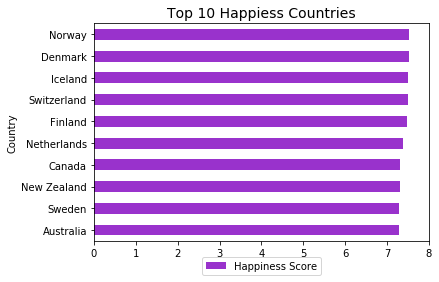

In [392]:
bar = top10.plot.barh(x='Country',y='Happiness Score',color='darkorchid')
bar.set_xlim(0,8)
bar.set_title('Top 10 Happiess Countries',{'fontsize':14})
bar.invert_yaxis()
bar.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, ncol=5)

In [386]:
cols = ['Country', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']
bar_data = top10[cols]

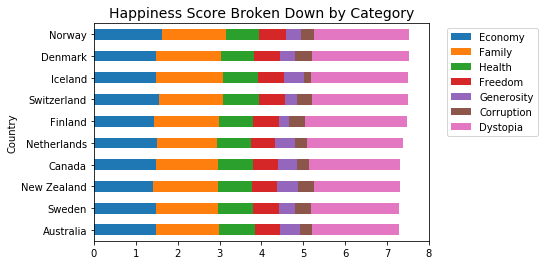

In [393]:
ax = bar_data.plot.barh(x='Country',stacked=True)
ax.invert_yaxis()
ax.set_xlim(0,8)
ax.set_title("Happiness Score Broken Down by Category",{'fontsize':14})
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

## Histogram of Job Satisfaction

[Text(0.5,0,'Percentage %')]

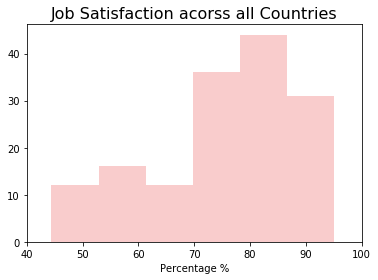

In [396]:
ax = sns.distplot(data['Job Satisfaction'],bins=6,kde=False, fit_kws={(40,100)},color='lightcoral')
plt.xlim(40,100)
plt.title("Job Satisfaction acorss all Countries", {'fontsize': 16})
ax.set(xlabel='Percentage %')

## Pairwise Scatter Plot

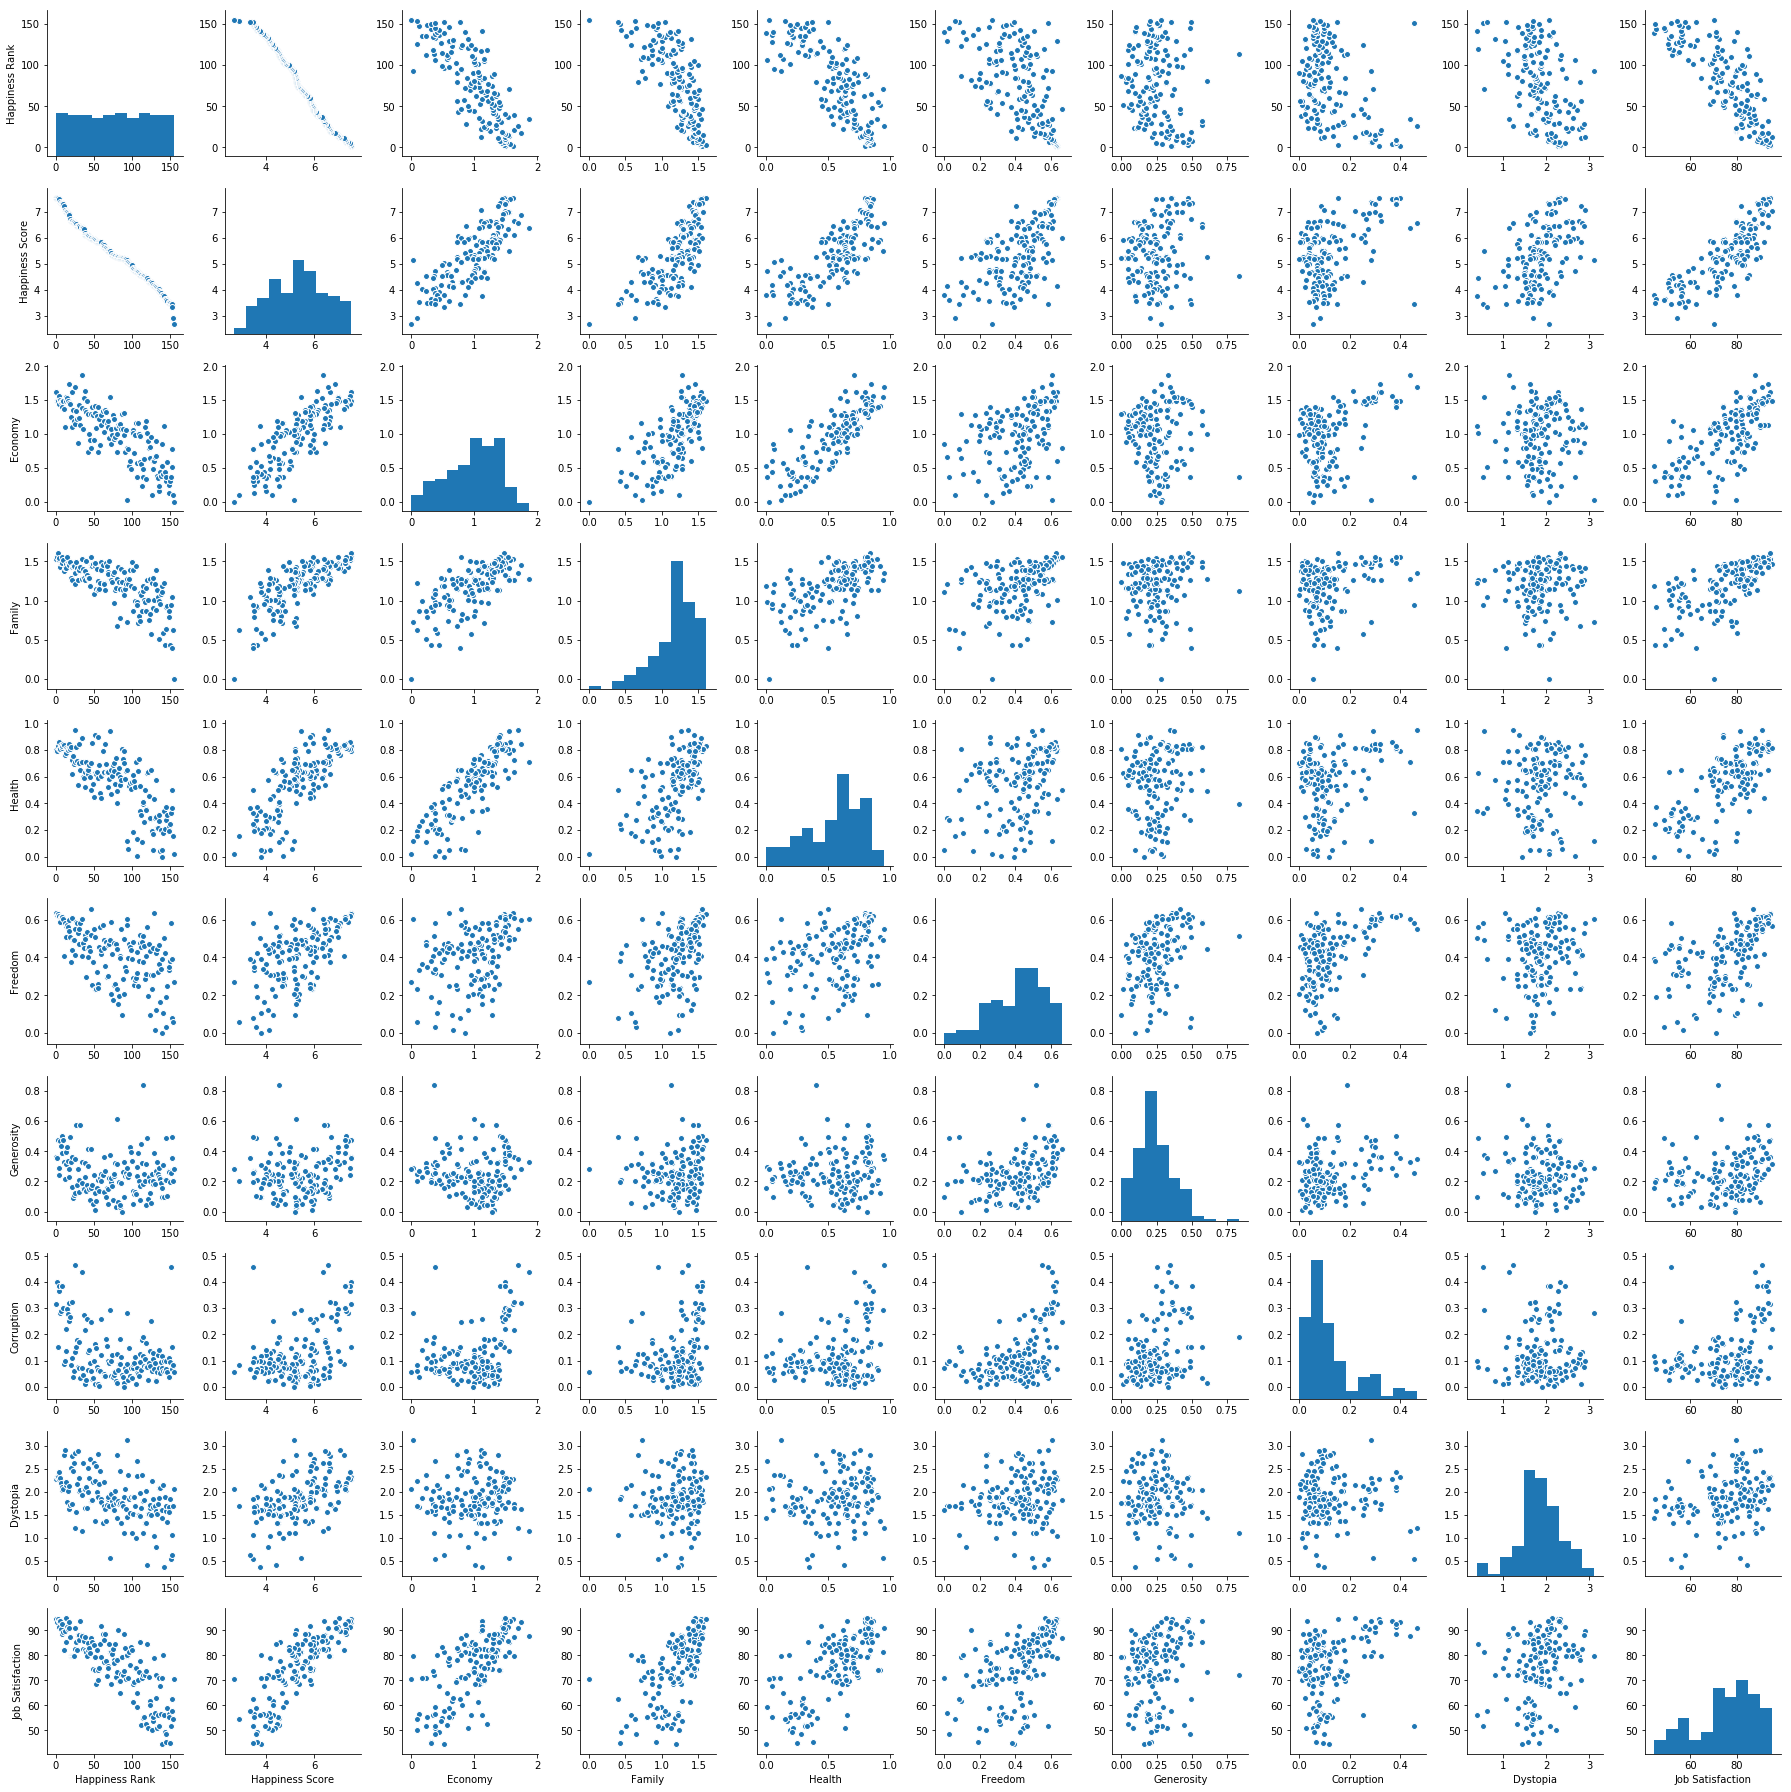

In [397]:
sns.pairplot(data)

## Correlation Matrix

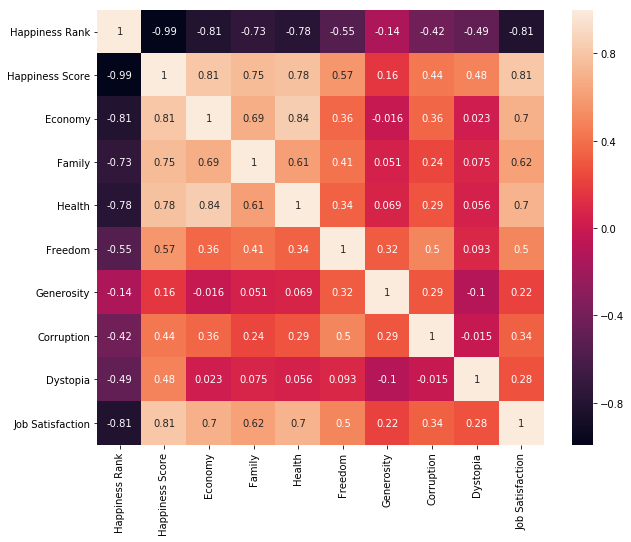

In [398]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

Looking the the heatmap there are 2 variables which correlate strongly to 'Happiness Score', with a value of 0.81. They are 'Economy' and 'Job Satisfaction'. This makes sense, as with a thriving economy means job placement, which in turns means a steady flow of income. This could provide a sense of security that many seek. As for 'Job Satisfaction', this probably means they are fortunate enough to be able to work or do a job that gives them a sense of achievement.

## Probabilities
Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe using Pandas.

In [399]:
(data['Happiness Score'] > 6.0).groupby(data['Region'] == 'Western Europe').count().div(len(data))

Region
False    0.874172
True     0.125828
Name: Happiness Score, dtype: float64

## Matrices
Define a matrix whose rows correspond to countries and the columns to the regions. Fill with 0/1 values where entry (i,j) is a 1 if the country in row i is in the corresponding region in column j, and 0 if not.

In [336]:
pd.crosstab(data['Country'],data['Region']).values

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
 

# Done, and Thank you for your valuable feedback!